# Synthetic Market Data Analysis
Analysis of SYNTH.json tick data with OHLC charts and basic statistics

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import os

## Load Data

In [2]:
# Load the JSON file
file_path = os.path.expanduser('~/Downloads/SYNTH.json')
with open(file_path, 'r') as f:
    data = json.load(f)

# Extract the data array
ticks = data['data']
print(f"Total ticks: {len(ticks)}")
print(f"First tick: {ticks[0]}")
print(f"Last tick: {ticks[-1]}")

Total ticks: 1000
First tick: {'time': '2025-10-02T18:19:16.326Z', 'ticker': 'SYNTH', 'price': '157.27', 'volume': 10622, 'bid': '157.15', 'ask': '157.39'}
Last tick: {'time': '2025-10-02T18:20:56.287Z', 'ticker': 'SYNTH', 'price': '129.38', 'volume': 15236, 'bid': '129.24', 'ask': '129.52'}


## Convert to DataFrame

In [3]:
# Convert to DataFrame
df = pd.DataFrame(ticks)

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Convert string prices to float
df['price'] = df['price'].astype(float)
df['bid'] = df['bid'].astype(float)
df['ask'] = df['ask'].astype(float)
df['volume'] = df['volume'].astype(int)

# Set time as index
df.set_index('time', inplace=True)

print(df.head())
print(f"\nData shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")

                                 ticker   price  volume     bid     ask
time                                                                   
2025-10-02 18:19:16.326000+00:00  SYNTH  157.27   10622  157.15  157.39
2025-10-02 18:19:16.426000+00:00  SYNTH  157.14   14358  156.98  157.31
2025-10-02 18:19:16.525000+00:00  SYNTH  157.27   10988  157.09  157.44
2025-10-02 18:19:16.626000+00:00  SYNTH  157.15   16414  157.07  157.23
2025-10-02 18:19:16.726000+00:00  SYNTH  157.41   14032  157.26  157.56

Data shape: (1000, 5)

Data types:
ticker     object
price     float64
volume      int64
bid       float64
ask       float64
dtype: object


## Basic Statistics

In [4]:
# Basic statistics
print("=" * 50)
print("BASIC STATISTICS")
print("=" * 50)

print(f"\nTime Range:")
print(f"  Start: {df.index.min()}")
print(f"  End: {df.index.max()}")
print(f"  Duration: {df.index.max() - df.index.min()}")

print(f"\nPrice Statistics:")
print(f"  Mean: ${df['price'].mean():.2f}")
print(f"  Median: ${df['price'].median():.2f}")
print(f"  Std Dev: ${df['price'].std():.2f}")
print(f"  Min: ${df['price'].min():.2f}")
print(f"  Max: ${df['price'].max():.2f}")
print(f"  Range: ${df['price'].max() - df['price'].min():.2f}")

print(f"\nVolume Statistics:")
print(f"  Total Volume: {df['volume'].sum():,}")
print(f"  Mean Volume: {df['volume'].mean():.0f}")
print(f"  Median Volume: {df['volume'].median():.0f}")
print(f"  Max Volume: {df['volume'].max():,}")

print(f"\nSpread Statistics:")
df['spread'] = df['ask'] - df['bid']
print(f"  Mean Spread: ${df['spread'].mean():.4f}")
print(f"  Median Spread: ${df['spread'].median():.4f}")
print(f"  Max Spread: ${df['spread'].max():.4f}")
print(f"  Min Spread: ${df['spread'].min():.4f}")

BASIC STATISTICS

Time Range:
  Start: 2025-10-02 18:19:16.326000+00:00
  End: 2025-10-02 18:20:56.287000+00:00
  Duration: 0 days 00:01:39.961000

Price Statistics:
  Mean: $140.00
  Median: $137.45
  Std Dev: $9.31
  Min: $125.78
  Max: $157.74
  Range: $31.96

Volume Statistics:
  Total Volume: 17,547,347
  Mean Volume: 17547
  Median Volume: 16242
  Max Volume: 42,402

Spread Statistics:
  Mean Spread: $0.2785
  Median Spread: $0.2800
  Max Spread: $0.4500
  Min Spread: $0.1200


## Create OHLC Data

In [5]:
# Resample to different timeframes and create OHLC
def create_ohlc(df, timeframe='1min'):
    ohlc = df['price'].resample(timeframe).ohlc()
    ohlc['volume'] = df['volume'].resample(timeframe).sum()
    ohlc = ohlc.dropna()
    return ohlc

# Create OHLC for different timeframes
ohlc_1s = create_ohlc(df, '1s')
ohlc_5s = create_ohlc(df, '5s')
ohlc_10s = create_ohlc(df, '10s')
ohlc_30s = create_ohlc(df, '30s')
ohlc_1min = create_ohlc(df, '1min')

print(f"\nOHLC Data Created:")
print(f"  1-second bars: {len(ohlc_1s)}")
print(f"  5-second bars: {len(ohlc_5s)}")
print(f"  10-second bars: {len(ohlc_10s)}")
print(f"  30-second bars: {len(ohlc_30s)}")
print(f"  1-minute bars: {len(ohlc_1min)}")

print(f"\nSample 5-second OHLC:")
print(ohlc_5s.head(10))


OHLC Data Created:
  1-second bars: 101
  5-second bars: 21
  10-second bars: 11
  30-second bars: 4
  1-minute bars: 2

Sample 5-second OHLC:
                             open    high     low   close  volume
time                                                             
2025-10-02 18:19:15+00:00  157.27  157.74  155.54  156.39  597899
2025-10-02 18:19:20+00:00  156.40  156.40  151.78  152.27  891536
2025-10-02 18:19:25+00:00  151.78  152.79  151.69  152.36  891064
2025-10-02 18:19:30+00:00  152.45  153.25  150.24  150.24  901967
2025-10-02 18:19:35+00:00  150.03  150.34  148.63  149.85  829514
2025-10-02 18:19:40+00:00  149.66  150.55  147.99  149.38  842129
2025-10-02 18:19:45+00:00  149.34  149.89  144.95  145.31  851645
2025-10-02 18:19:50+00:00  144.71  144.79  141.44  142.03  828489
2025-10-02 18:19:55+00:00  142.16  142.89  140.06  140.06  885009
2025-10-02 18:20:00+00:00  140.18  140.34  138.20  138.20  862242


## Plot OHLC Candlestick Chart (5-second bars)

In [6]:
# Create candlestick chart using plotly
fig = go.Figure(data=[go.Candlestick(
    x=ohlc_5s.index,
    open=ohlc_5s['open'],
    high=ohlc_5s['high'],
    low=ohlc_5s['low'],
    close=ohlc_5s['close'],
    name='SYNTH'
)])

fig.update_layout(
    title='SYNTH - 5 Second Candlestick Chart',
    yaxis_title='Price ($)',
    xaxis_title='Time',
    height=600,
    xaxis_rangeslider_visible=False
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## Plot OHLC Candlestick Chart (30-second bars)

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=ohlc_30s.index,
    open=ohlc_30s['open'],
    high=ohlc_30s['high'],
    low=ohlc_30s['low'],
    close=ohlc_30s['close'],
    name='SYNTH'
)])

fig.update_layout(
    title='SYNTH - 30 Second Candlestick Chart',
    yaxis_title='Price ($)',
    xaxis_title='Time',
    height=600,
    xaxis_rangeslider_visible=False
)

fig.show()

## Price and Volume Analysis

In [7]:
# Create subplots for price and volume
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=('Price', 'Volume'),
    row_heights=[0.7, 0.3]
)

# Add candlestick
fig.add_trace(
    go.Candlestick(
        x=ohlc_5s.index,
        open=ohlc_5s['open'],
        high=ohlc_5s['high'],
        low=ohlc_5s['low'],
        close=ohlc_5s['close'],
        name='Price'
    ),
    row=1, col=1
)

# Add volume bars
fig.add_trace(
    go.Bar(
        x=ohlc_5s.index,
        y=ohlc_5s['volume'],
        name='Volume',
        marker_color='rgba(0, 150, 255, 0.6)'
    ),
    row=2, col=1
)

fig.update_layout(
    title='SYNTH - Price and Volume (5s bars)',
    height=800,
    xaxis_rangeslider_visible=False,
    showlegend=False
)

fig.update_yaxes(title_text='Price ($)', row=1, col=1)
fig.update_yaxes(title_text='Volume', row=2, col=1)
fig.update_xaxes(title_text='Time', row=2, col=1)

fig.show()

## Price Distribution

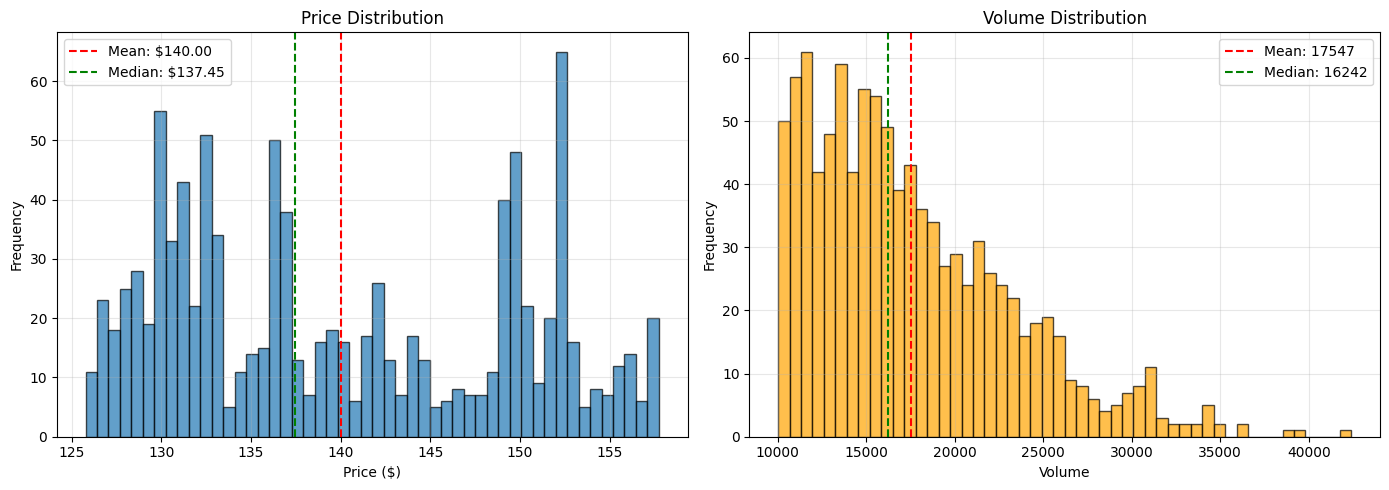

In [8]:
# Plot price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price"].mean():.2f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: ${df["price"].median():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Volume distribution
axes[1].hist(df['volume'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Volume')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Volume Distribution')
axes[1].axvline(df['volume'].mean(), color='red', linestyle='--', label=f'Mean: {df["volume"].mean():.0f}')
axes[1].axvline(df['volume'].median(), color='green', linestyle='--', label=f'Median: {df["volume"].median():.0f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Returns Analysis

Returns Statistics (5s bars):
  Mean Return: -0.9337%
  Std Dev: 1.4291%
  Min Return: -3.3083%
  Max Return: 2.0005%
  Skewness: 0.0629
  Kurtosis: -0.7029


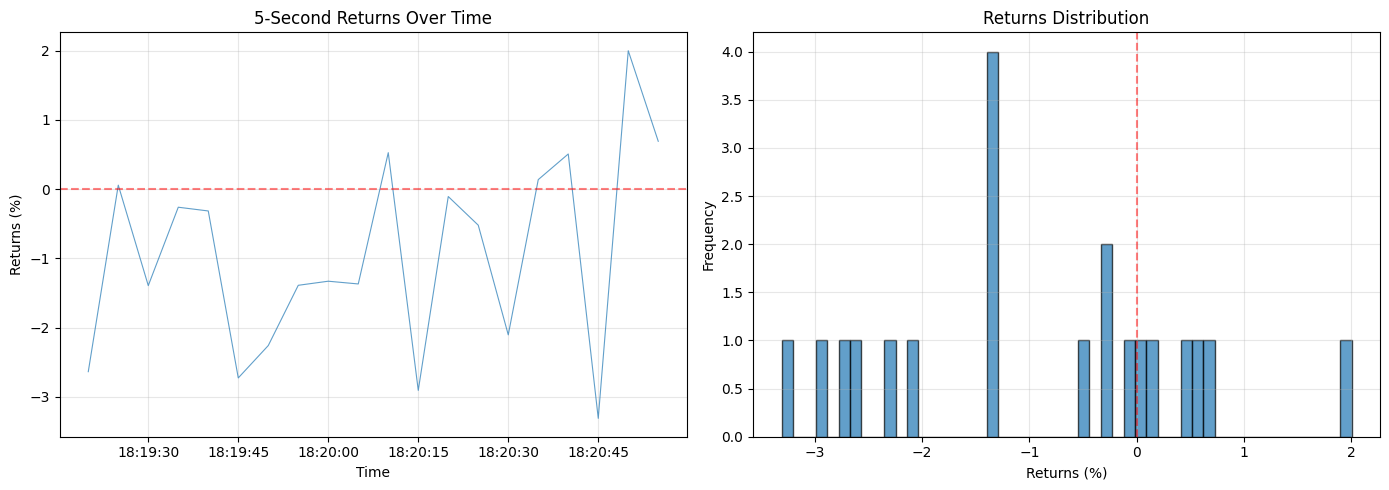

In [9]:
# Calculate returns on 5s OHLC data
ohlc_5s['returns'] = ohlc_5s['close'].pct_change() * 100

print("Returns Statistics (5s bars):")
print(f"  Mean Return: {ohlc_5s['returns'].mean():.4f}%")
print(f"  Std Dev: {ohlc_5s['returns'].std():.4f}%")
print(f"  Min Return: {ohlc_5s['returns'].min():.4f}%")
print(f"  Max Return: {ohlc_5s['returns'].max():.4f}%")
print(f"  Skewness: {ohlc_5s['returns'].skew():.4f}")
print(f"  Kurtosis: {ohlc_5s['returns'].kurtosis():.4f}")

# Plot returns distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Returns over time
axes[0].plot(ohlc_5s.index, ohlc_5s['returns'], alpha=0.7, linewidth=0.8)
axes[0].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Returns (%)')
axes[0].set_title('5-Second Returns Over Time')
axes[0].grid(alpha=0.3)

# Returns histogram
axes[1].hist(ohlc_5s['returns'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Returns (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Returns Distribution')
axes[1].axvline(0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Bid-Ask Spread Analysis

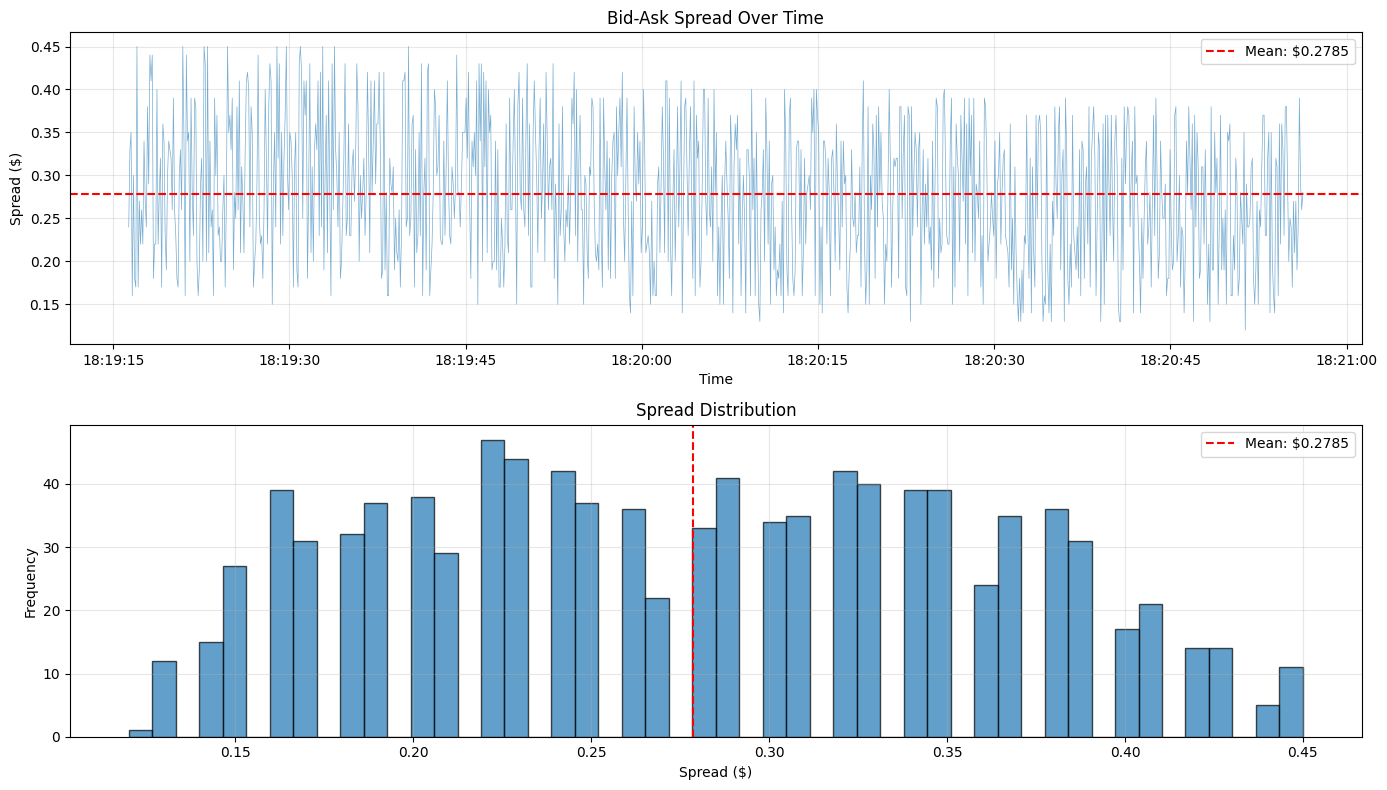

In [10]:
# Analyze bid-ask spread over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Spread over time
axes[0].plot(df.index, df['spread'], alpha=0.6, linewidth=0.5)
axes[0].axhline(df['spread'].mean(), color='red', linestyle='--', label=f'Mean: ${df["spread"].mean():.4f}')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Spread ($)')
axes[0].set_title('Bid-Ask Spread Over Time')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Spread distribution
axes[1].hist(df['spread'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Spread ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Spread Distribution')
axes[1].axvline(df['spread'].mean(), color='red', linestyle='--', label=f'Mean: ${df["spread"].mean():.4f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Summary Statistics Table

In [11]:
# Create summary table
summary = pd.DataFrame({
    'Metric': [
        'Total Ticks',
        'Duration',
        'Mean Price',
        'Price Range',
        'Price Volatility (std)',
        'Total Volume',
        'Mean Volume per Tick',
        'Mean Spread',
        'Mean Spread (bps)',
    ],
    'Value': [
        f"{len(df):,}",
        f"{df.index.max() - df.index.min()}",
        f"${df['price'].mean():.2f}",
        f"${df['price'].max() - df['price'].min():.2f}",
        f"${df['price'].std():.4f}",
        f"{df['volume'].sum():,}",
        f"{df['volume'].mean():.0f}",
        f"${df['spread'].mean():.4f}",
        f"{(df['spread'].mean() / df['price'].mean() * 10000):.2f}",
    ]
})

print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(summary.to_string(index=False))


SUMMARY STATISTICS
                Metric                  Value
           Total Ticks                  1,000
              Duration 0 days 00:01:39.961000
            Mean Price                $140.00
           Price Range                 $31.96
Price Volatility (std)                $9.3076
          Total Volume             17,547,347
  Mean Volume per Tick                  17547
           Mean Spread                $0.2785
     Mean Spread (bps)                  19.89
